In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
df.duplicated().sum()

np.int64(146)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [10]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
import seaborn as sns
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

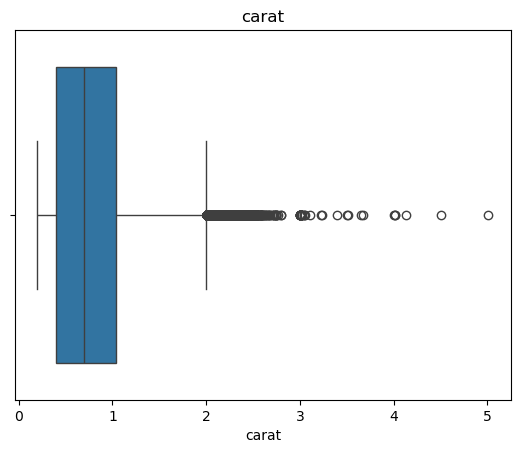

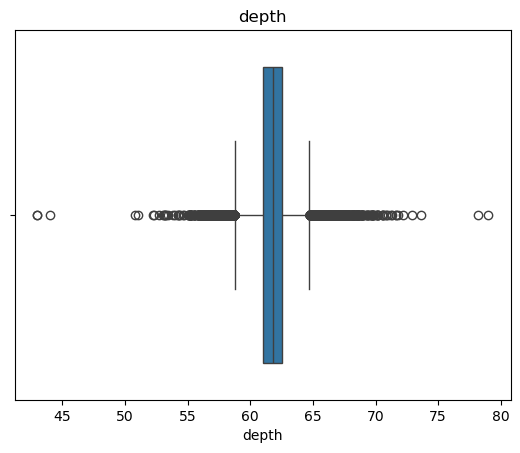

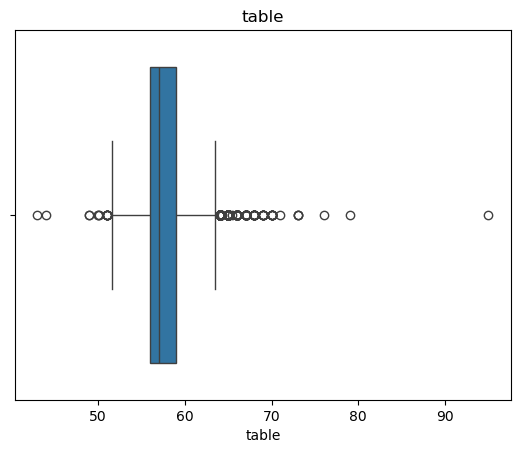

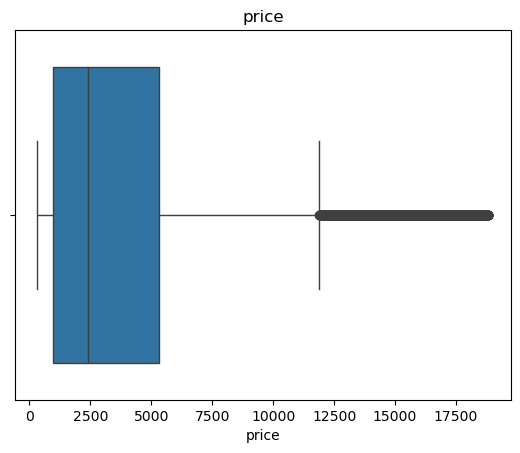

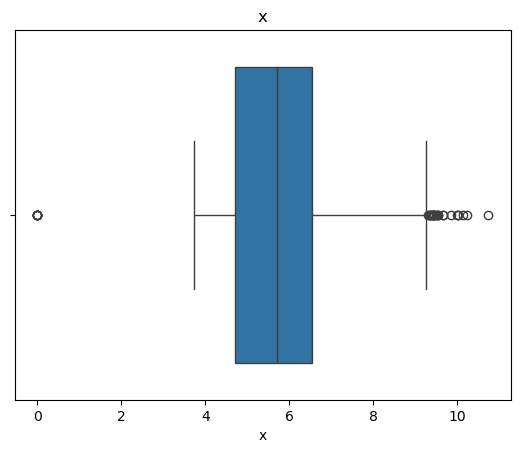

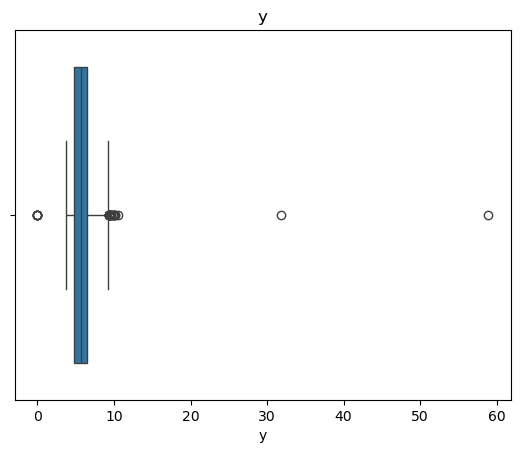

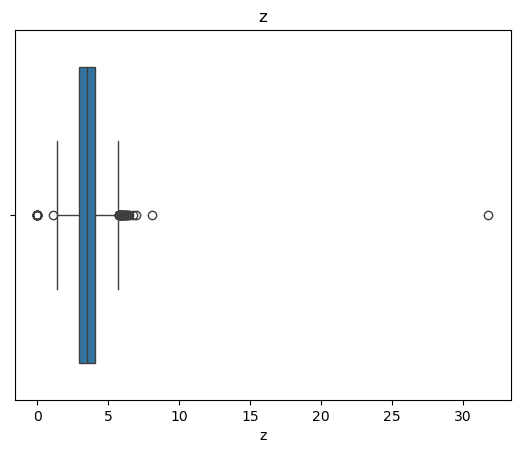

In [12]:
outliers(df)

In [13]:
def IQR(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    print("LF---->",lf)
    print("UF---->",uf)

In [14]:
df.select_dtypes([int,float]).columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [15]:
IQR(df["carat"])

LF----> -0.5599999999999999
UF----> 2.0


In [16]:
IQR(df["depth"])

LF----> 58.75
UF----> 64.75


In [17]:
IQR(df["table"])

LF----> 51.5
UF----> 63.5


In [18]:
IQR(df["price"])

LF----> -5612.625
UF----> 11890.375


In [19]:
IQR(df["x"])

LF----> 1.9649999999999999
UF----> 9.285


In [20]:
IQR(df["y"])

LF----> 1.9899999999999993
UF----> 9.27


In [21]:
IQR(df["z"])

LF----> 1.23
UF----> 5.710000000000001


In [22]:
df["carat"]=np.where(df["carat"]>2,2,df["carat"])
df["depth"]=np.where(df["depth"]>64.75,64.75,df["depth"])
df["depth"]=np.where(df["depth"]<58.75,58.75,df["depth"])
df["table"]=np.where(df["table"]>63.5,63.5,df["carat"])
df["table"]=np.where(df["table"]<51.5,51.5,df["carat"])
df["price"]=np.where(df["price"]>11885.625,11885.625,df["price"])
df["x"]=np.where(df["x"]>9.285,9.285,df["x"])
df["x"]=np.where(df["x"]< 1.9649999999999999, 1.9649999999999999,df["x"])
df["y"]=np.where(df["y"]>9.27,9.27,df["y"])
df["y"]=np.where(df["y"]<1.9899999999999993,1.9899999999999993,df["y"])
df["z"]=np.where(df["z"]>5.734999999999999,5.734999999999999,df["z"])
df["z"]=np.where(df["z"]<1.2150000000000003,1.2150000000000003,df["z"])

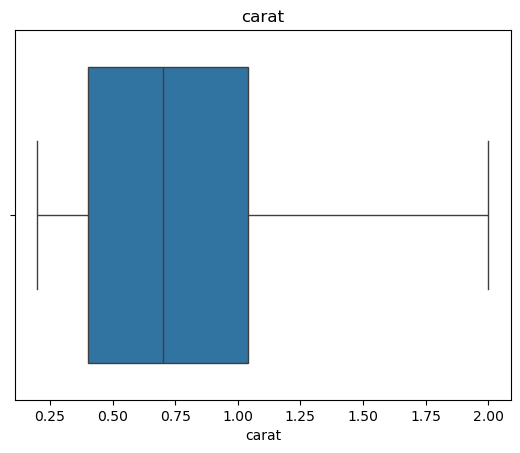

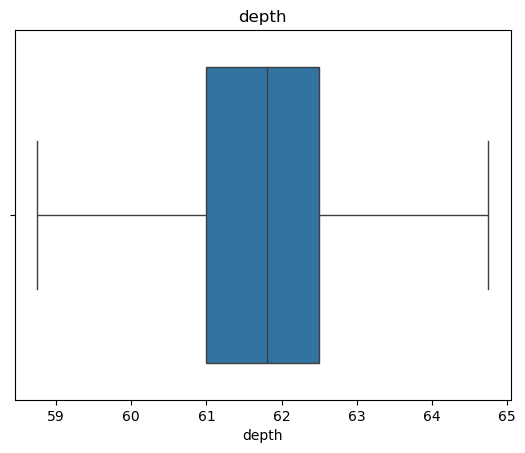

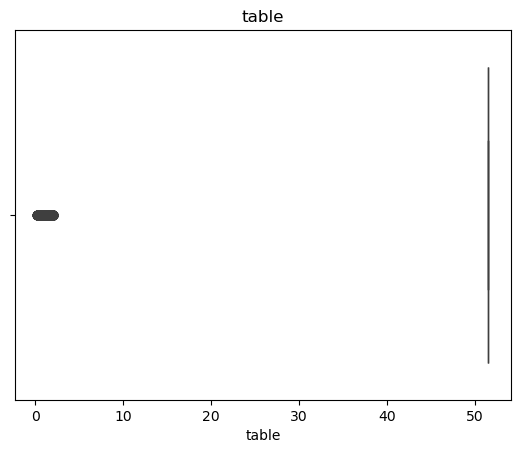

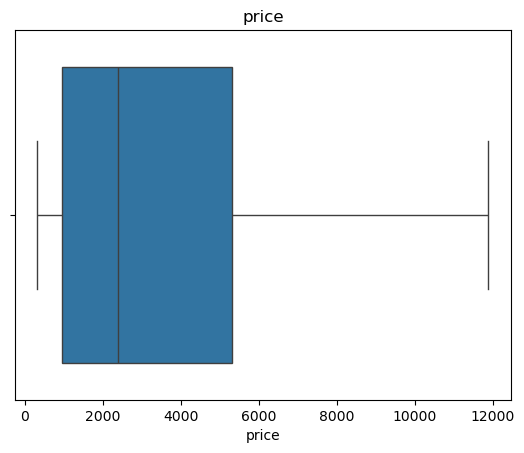

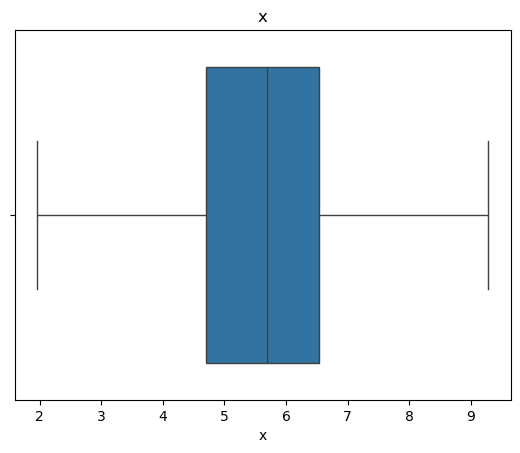

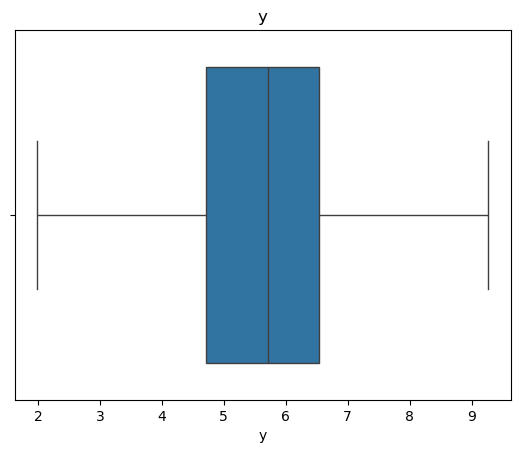

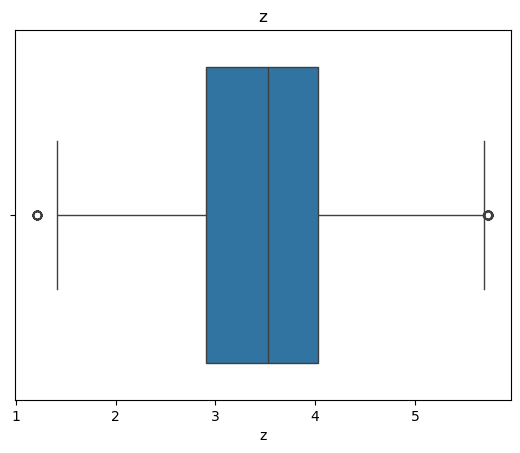

In [23]:
outliers(df)

In [24]:
num=df.select_dtypes([int,float])

In [25]:
num.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.021519,-0.031320,0.936550,0.981959,0.981231,0.977541
depth,0.021519,1.000000,0.118727,-0.009093,-0.029115,-0.031816,0.089763
table,-0.031320,0.118727,1.000000,-0.008350,-0.040850,-0.036023,-0.020428
price,0.936550,-0.009093,-0.008350,1.000000,0.911962,0.913485,0.904994
x,0.981959,-0.029115,-0.040850,0.911962,1.000000,0.998357,0.988228
y,0.981231,-0.031816,-0.036023,0.913485,0.998357,1.000000,0.987851
z,0.977541,0.089763,-0.020428,0.904994,0.988228,0.987851,1.000000


In [59]:
df.select_dtypes(object).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [60]:
df["cut"].nunique()

5

In [61]:
df["color"].nunique()

7

In [62]:
df["clarity"].nunique()

8

In [63]:
df["cut"].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [64]:
df["color"].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [65]:
df["clarity"].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [66]:
diam=pd.get_dummies(df,columns=['cut', 'color', 'clarity'], drop_first=True)

In [67]:
diam

,carat,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326.0,3.95,3.98,2.43,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,326.0,3.89,3.84,2.31,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,327.0,4.05,4.07,2.31,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,334.0,4.20,4.23,2.63,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,335.0,4.34,4.35,2.75,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2757.0,5.75,5.76,3.50,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,2757.0,5.69,5.75,3.61,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,2757.0,5.66,5.68,3.56,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,2757.0,6.15,6.12,3.74,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False


In [68]:
diam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53794 non-null  float64
 1   price          53794 non-null  float64
 2   x              53794 non-null  float64
 3   y              53794 non-null  float64
 4   z              53794 non-null  float64
 5   cut_Good       53794 non-null  bool   
 6   cut_Ideal      53794 non-null  bool   
 7   cut_Premium    53794 non-null  bool   
 8   cut_Very Good  53794 non-null  bool   
 9   color_E        53794 non-null  bool   
 10  color_F        53794 non-null  bool   
 11  color_G        53794 non-null  bool   
 12  color_H        53794 non-null  bool   
 13  color_I        53794 non-null  bool   
 14  color_J        53794 non-null  bool   
 15  clarity_IF     53794 non-null  bool   
 16  clarity_SI1    53794 non-null  bool   
 17  clarity_SI2    53794 non-null  bool   
 18  clarity_VS1

In [80]:
x=diam.drop(columns="price")
y=diam["price"]

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=55)

In [82]:
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
print("R_square",lr.score(x_train,y_train))

R_square 0.9684492330590315


<Axes: xlabel='price', ylabel='Density'>

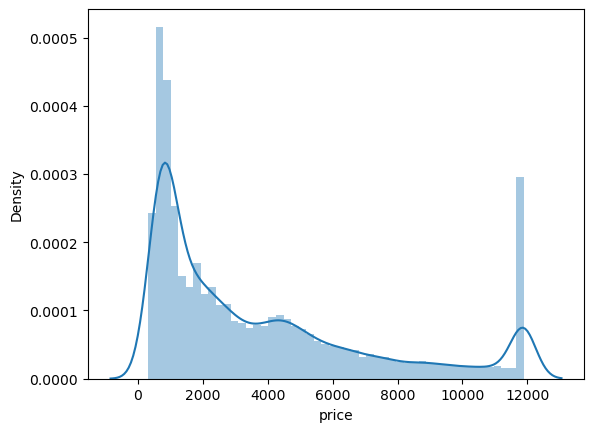

In [74]:
sns.distplot(diam["price"])

<Axes: xlabel='price', ylabel='Density'>

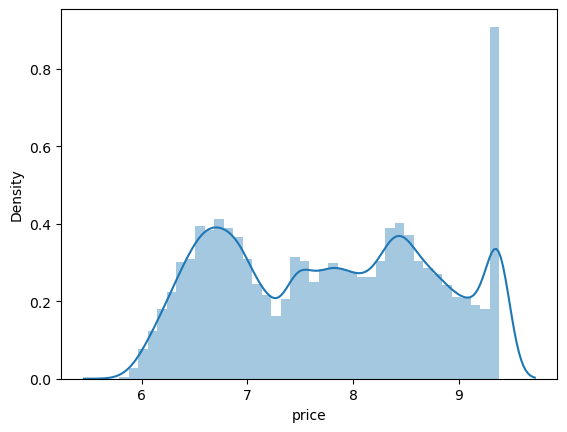

In [75]:
sns.distplot(np.log1p(diam["price"]))

<Axes: xlabel='price', ylabel='Density'>

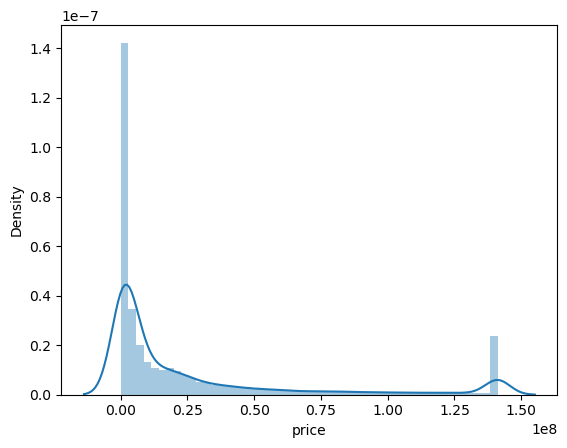

In [76]:
sns.distplot(np.square(diam["price"]))

In [77]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [85]:
lr.predict(x_train)

array([6.41725456, 7.89470846, 7.78535839, ..., 6.32681622, 6.80556457,
       8.32969634])

In [88]:
actual=y_train
pred=lr.predict(x_train)
error=actual - pred
MSE=np.mean(np.square(error))
RMSE=np.sqrt(MSE)
print('MEAN SQUARE ERROR---->',MSE)
print('ROOT MEAN SQUARE ERROR---->',RMSE)

MEAN SQUARE ERROR----> 29806698.665384773
ROOT MEAN SQUARE ERROR----> 5459.551141383765
